In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import sys

In [2]:
home = pathlib.Path.home()
path = str(pathlib.Path(home, 'DOSY'))
sys.path.insert(1, path)

In [ ]:
from src.mixture_fit import gen_data, fits, sum_exp_curv
from src.data_loading import load_data
from src.optimal_number import AIC_analysis, BIC_analysis, chi2_analysis

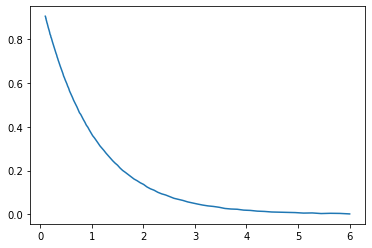

In [4]:
params = np.array([1, 1])
seed=5000
n=128
sigma=0.001
x, y = gen_data(seed, params, n, sigma)
plt.plot(x, y)

Text(0.5, 0, 'Z * 1e-6')

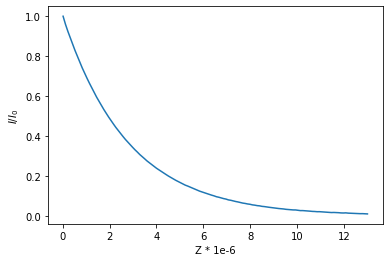

In [5]:
path = str(pathlib.Path(home, 'DOSY\data', 'R5 128DOSY.txt'))
scale = 1e6
x, y = load_data(path, scale=scale)
plt.plot(x, y)
plt.ylabel('$I/I_0$')
plt.xlabel('Z * 1e-6')

In [6]:
%%time
params_estct, s = fits(x, y, n_max=5)
print(s)
params_estct

0.01673330073547895
CPU times: total: 109 ms
Wall time: 126 ms


[array([0.99999954, 0.35816751]),
 array([0.99862639, 0.3578867 , 0.00711032, 2.12434798]),
 array([9.95890586e-01, 3.57442422e-01, 6.84554279e-03, 9.44502635e-01,
        5.21484892e-03, 1.00000000e+01]),
 array([9.95891379e-01, 3.57442536e-01, 6.84484135e-03, 9.44585599e-01,
        1.00128166e-03, 9.99999987e+00, 4.21344585e-03, 1.00000000e+01]),
 array([9.95891084e-01, 3.57442495e-01, 5.84484893e-03, 9.44548979e-01,
        1.00024209e-03, 9.44570742e-01, 1.23918241e-03, 1.00000000e+01,
        3.97560304e-03, 1.00000000e+01])]

In [142]:
# %%time
# params_est, s = fits(x, y, method='dual_annealing', n_max=5, reg=0.)
# print(s)
# params_est

C:\Users\mipt-\DOSY\src\mixture_fit.py:10: RuntimeWarning: overflow encountered in exp
  :param params: Starting with 1, odd params - weights of exponents, even params - coefficients
C:\Users\mipt-\DOSY\venv\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\mipt-\DOSY\src\mixture_fit.py:10: RuntimeWarning: overflow encountered in exp
  :param params: Starting with 1, odd params - weights of exponents, even params - coefficients
C:\Users\mipt-\DOSY\src\mixture_fit.py:10: RuntimeWarning: overflow encountered in exp
  :param params: Starting with 1, odd params - weights of exponents, even params - coefficients
C:\Users\mipt-\DOSY\venv\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\mipt-\DOSY\src\mixture_fit.py:10: RuntimeWarning: overflow encountered in exp
  :param params: Starting with 1, odd params - weights of exponents,

0.01381410295208942
CPU times: total: 5min 34s
Wall time: 5min 35s


[array([0.999999  , 0.59015374]),
 array([0.86680701, 0.59043876, 0.1336879 , 0.59046352]),
 array([0.88716816, 0.58590348, 0.11088592, 0.61505718, 0.01000103,
        9.99678248]),
 array([0.97625371, 0.58780733, 0.0102657 , 0.62799157, 0.0108081 ,
        0.63018188, 0.01000262, 7.31839705]),
 array([0.90859174, 0.58434895, 0.0767727 , 0.62201972, 0.01009245,
        0.62686936, 0.01000061, 9.45094057, 0.01001239, 9.99978977])]

3


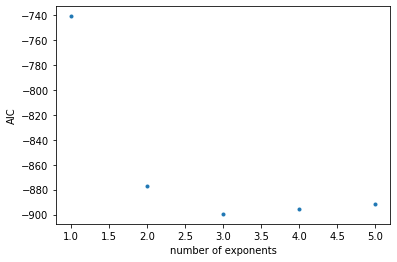

Text(0.5, 0, 'number of exponents')

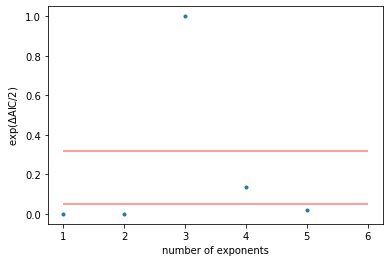

In [7]:
m, aics, aic_probs = AIC_analysis(x, y, params_estct, s)
print(m+1)
plt.plot(range(1, len(aics)+1), aics, '.')
plt.ylabel('AIC')
plt.xlabel('number of exponents')
plt.show()
plt.plot(range(1, len(aics)+1), aic_probs, '.')
plt.hlines(0.32, 1, len(aics) + 1, 'r', alpha=0.5)
plt.hlines(0.05, 1, len(aics) + 1, 'r', alpha=0.5)
plt.ylabel('exp($\Delta$AIC/2)')
plt.xlabel('number of exponents')

2


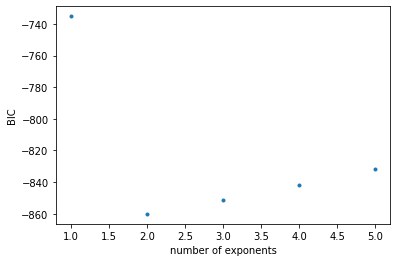

Text(0.5, 0, 'number of exponents')

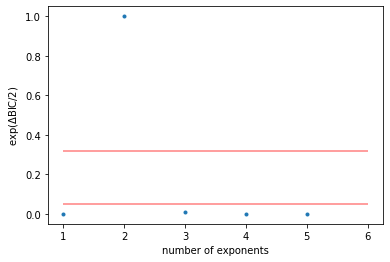

In [158]:
m, bics, bic_probs = BIC_analysis(x, y, params_estct, s)
print(m+1)
plt.plot(range(1, len(bics)+1), bics, '.')
plt.ylabel('BIC')
plt.xlabel('number of exponents')
plt.show()
plt.plot(range(1, len(bics)+1), bic_probs, '.')
plt.hlines(0.32, 1, len(aics) + 1, 'r', alpha=0.5)
plt.hlines(0.05, 1, len(aics) + 1, 'r', alpha=0.5)
plt.ylabel('exp($\Delta$BIC/2)')
plt.xlabel('number of exponents')

2


Text(0.5, 0, 'number of exponents')

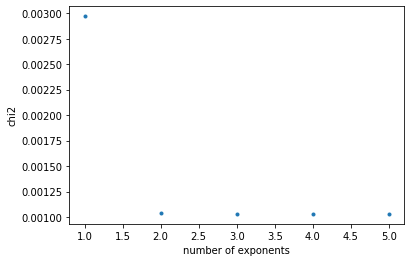

In [160]:
m, chi2s = chi2_analysis(x, y, params_estct, s, chi2_rel_change=0.01)
print(m+1)
plt.plot(range(1, len(chi2s)+1), chi2s, '.')
plt.ylabel('chi2')
plt.xlabel('number of exponents')

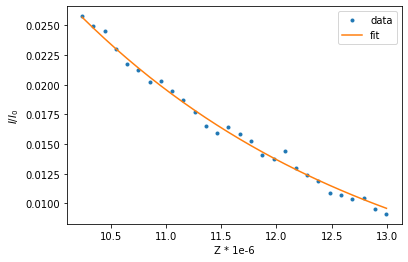

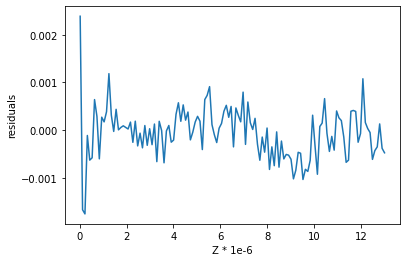

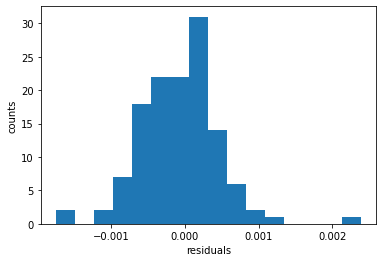

In [171]:
y_pred = sum_exp_curv(x, *params_estct[1])
first = 200
last = 100
plt.plot(x[last:first], y[last:first], '.', label='data')
plt.plot(x[last:first], y_pred[last:first], label='fit')
plt.legend()
plt.ylabel('$I/I_0$')
plt.xlabel('Z * 1e-6')
plt.show()
res = y - y_pred
plt.plot(x, res)
plt.ylabel('residuals')
plt.xlabel('Z * 1e-6')
plt.show()
plt.hist(res, bins='auto')
plt.xlabel('residuals')
plt.ylabel('counts')
plt.show()

236.05171342487918


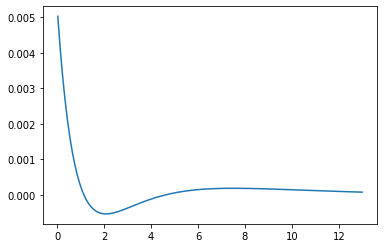

In [172]:
y_pred1 = sum_exp_curv(x, *params_estct[1])
y_pred2 = sum_exp_curv(x, *params_estct[0])
plt.plot(x, y_pred1-y_pred2)
print(np.linalg.norm(y_pred1-y_pred2)/np.sum(res**2))